In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
mail = pd.read_csv("spam_mail.csv")

In [3]:
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
mail.shape

(5572, 2)

<b>Data Cleaning</b>

In [5]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
mail.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
mail.duplicated().sum()

415

In [8]:
mail = mail.drop_duplicates(keep = "first")

In [9]:
mail.shape

(5157, 2)

<b>EDA</b>

In [10]:
mail.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
mail.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,Come by our room at some point so we can iron ...
freq,4516,1


In [12]:
mail["Category"].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

In [13]:
encoder = LabelEncoder()

mail["Category"] = encoder.fit_transform(mail["Category"])

In [14]:
mail.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
mail["Length"] = mail["Message"].apply(len)

In [16]:
mail.head()

,Category,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


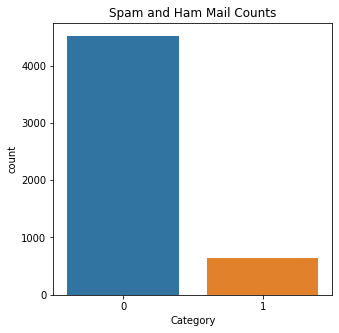

In [17]:
#sns.set()
plt.figure(figsize = (5,5))
sns.countplot(data = mail, x = "Category")
plt.title("Spam and Ham Mail Counts")
plt.show()

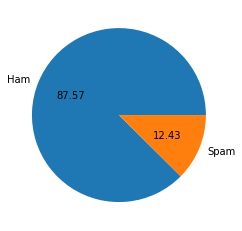

In [18]:
plt.pie(mail["Category"].value_counts(), labels = ["Ham", "Spam"], autopct = "%0.2f")
plt.show()

<AxesSubplot: ylabel='Frequency'>

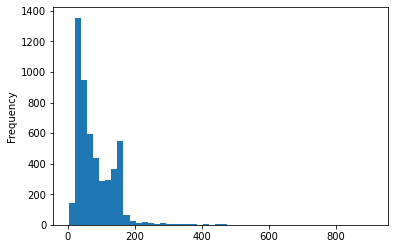

In [19]:
mail["Length"].plot(kind = "hist", bins = 50)

In [20]:
import nltk

In [21]:
mail["Number_of_Words"] = mail["Message"].apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
mail.head()

,Category,Message,Length,Number_of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
mail["Number_of_Sentences"] = mail["Message"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
mail.head()

,Category,Message,Length,Number_of_Words,Number_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
mail[["Length", "Number_of_Words", "Number_of_Sentences"]].describe()

,Length,Number_of_Words,Number_of_Sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560016,1.965290
std,58.382922,13.403671,1.439549
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
mail[mail["Category"] == 0][["Length", "Number_of_Words", "Number_of_Sentences"]].describe()

,Length,Number_of_Words,Number_of_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267272,1.822852
std,56.708301,13.585433,1.374848
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
mail[mail["Category"] == 1][["Length", "Number_of_Words", "Number_of_Sentences"]].describe()

,Length,Number_of_Words,Number_of_Sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.968799
std,30.399707,7.103501,1.486069
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot: xlabel='Length', ylabel='Count'>

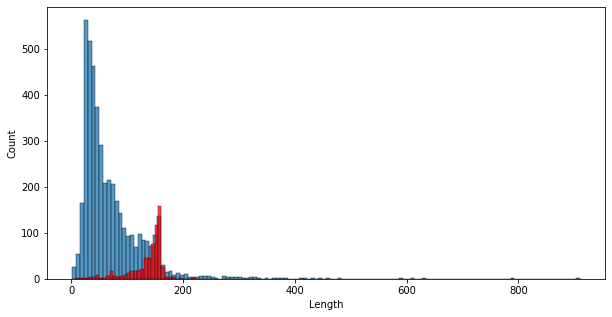

In [28]:
plt.figure(figsize = (10, 5))
sns.histplot(mail[mail["Category"] == 0]["Length"])
sns.histplot(mail[mail["Category"] == 1]["Length"], color = "red")

<AxesSubplot: xlabel='Number_of_Words', ylabel='Count'>

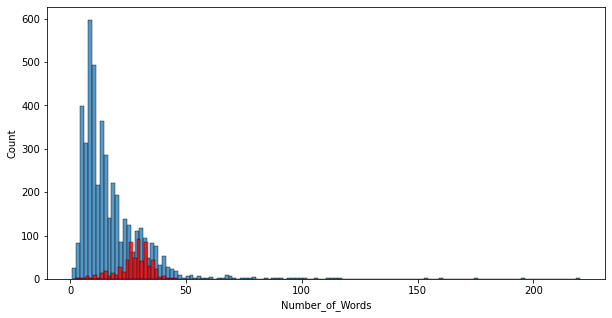

In [29]:
plt.figure(figsize = (10, 5))
sns.histplot(mail[mail["Category"] == 0]["Number_of_Words"])
sns.histplot(mail[mail["Category"] == 1]["Number_of_Words"], color = "red")

<AxesSubplot: xlabel='Number_of_Sentences', ylabel='Count'>

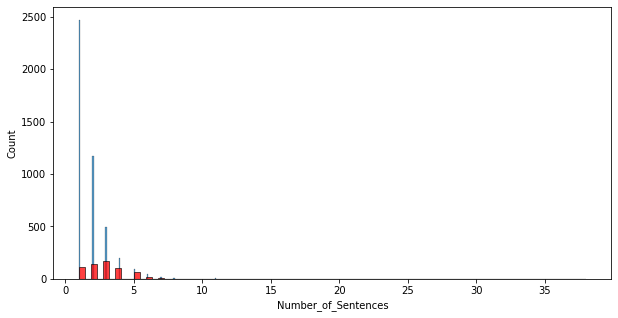

In [30]:
plt.figure(figsize = (10, 5))
sns.histplot(mail[mail["Category"] == 0]["Number_of_Sentences"])
sns.histplot(mail[mail["Category"] == 1]["Number_of_Sentences"], color = "red")

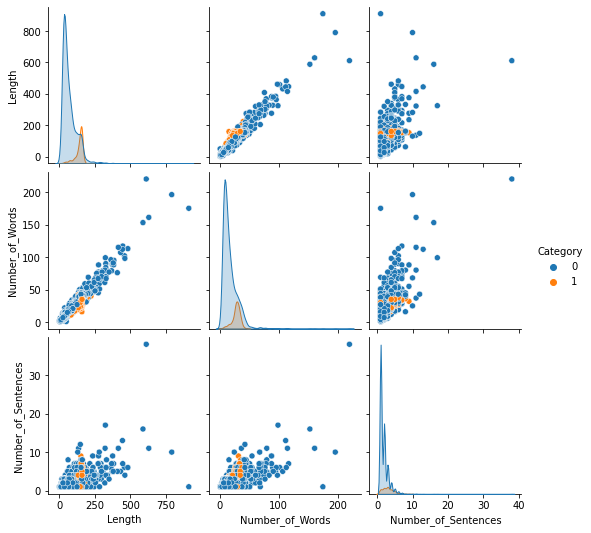

In [31]:
sns.pairplot(data = mail, hue = "Category")

<AxesSubplot: >

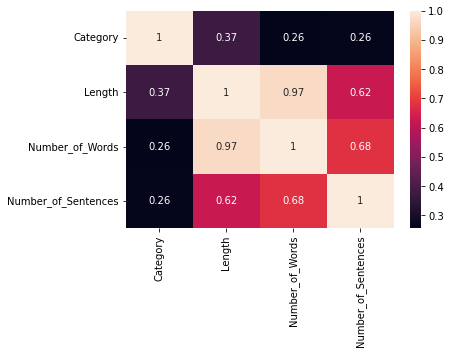

In [32]:
sns.heatmap(mail.corr(), annot = True)

<b>Data Preprocessing</b>

In [33]:
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
        
    return " ".join(y)
    

In [34]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
mail["Transformed_Message"] = mail["Message"].apply(transform_message)

In [38]:
mail.head()

,Category,Message,Length,Number_of_Words,Number_of_Sentences,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud

In [40]:
word_cloud = WordCloud(height = 500, width = 500, min_font_size = 10, background_color = "white")

In [41]:
spam_wordcloud = word_cloud.generate(mail[mail["Category"] == 1]["Transformed_Message"].str.cat(sep = " "))

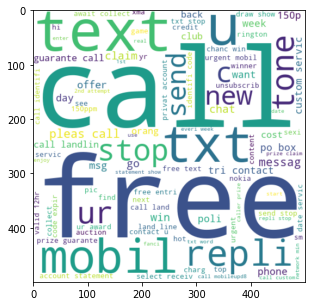

In [42]:
plt.figure(figsize = (8,5))
plt.imshow(spam_wordcloud, interpolation = "bilinear")

In [43]:
ham_wordcloud = word_cloud.generate(mail[mail["Category"] == 0]["Transformed_Message"].str.cat(sep = " "))

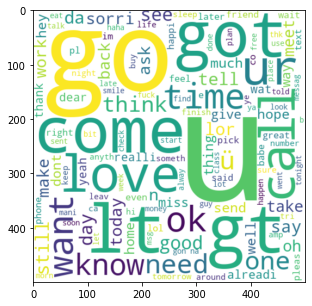

In [44]:
plt.figure(figsize = (8,5))
plt.imshow(spam_wordcloud, interpolation = "bilinear")

In [45]:
spam_corpus = []

for msg in mail[mail["Category"] == 1]["Transformed_Message"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9781

In [47]:
from collections import Counter
Counter(spam_corpus).most_common(20)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55)]

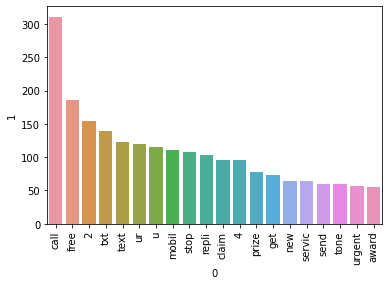

In [48]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(20))[0], 
            y = pd.DataFrame(Counter(spam_corpus).most_common(20))[1])

plt.xticks(rotation = "vertical")            
plt.show()

In [49]:
ham_corpus = []

for msg in mail[mail["Category"] == 0]["Transformed_Message"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
len(ham_corpus)

35938

In [51]:
Counter(ham_corpus).most_common(20)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 216),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171)]

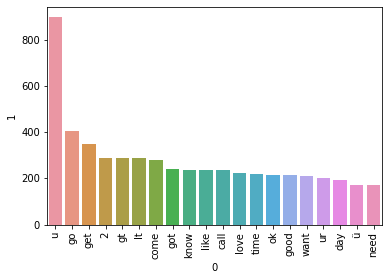

In [52]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(20))[0], 
            y = pd.DataFrame(Counter(ham_corpus).most_common(20))[1])

plt.xticks(rotation = "vertical")            
plt.show()

<b>Model Building</b>

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [54]:
#X = cv.fit_transform(mail["Transformed_Message"]).toarray()
X = tfidf.fit_transform(mail["Transformed_Message"]).toarray()

In [55]:
X.shape

(5157, 6781)

In [56]:
y = mail["Category"].values

In [57]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train, y_train)
y_prediction1 = gnb.predict(X_test)
print("Accuracy score on Gaussian Model", accuracy_score(y_test, y_prediction1))
print("Confusion Matrix", confusion_matrix(y_test, y_prediction1))
print("Precision Score", precision_score(y_test, y_prediction1))

Accuracy score on Gaussian Model 0.8691860465116279
Confusion Matrix [[787 118]
 [ 17 110]]
Precision Score 0.4824561403508772


In [63]:
mnb.fit(X_train, y_train)
y_prediction2 = mnb.predict(X_test)
print("Accuracy score on Multinomial Model", accuracy_score(y_test, y_prediction2))
print("Confusion Matrix", confusion_matrix(y_test, y_prediction2))
print("Precision Score", precision_score(y_test, y_prediction2))

Accuracy score on Multinomial Model 0.9612403100775194
Confusion Matrix [[905   0]
 [ 40  87]]
Precision Score 1.0


In [64]:
bnb.fit(X_train, y_train)
y_prediction3 = bnb.predict(X_test)
print("Accuracy score on Bernoulli Model", accuracy_score(y_test, y_prediction3))
print("Confusion Matrix", confusion_matrix(y_test, y_prediction3))
print("Precision Score", precision_score(y_test, y_prediction3))

Accuracy score on Bernoulli Model 0.9718992248062015
Confusion Matrix [[902   3]
 [ 26 101]]
Precision Score 0.9711538461538461


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
svc = SVC(kernel = "sigmoid", gamma = 1.0)

knc = KNeighborsClassifier()

mnb = MultinomialNB()

dtc = DecisionTreeClassifier(max_depth = 5)

lrc = LogisticRegression(solver = "liblinear", penalty = "l1")

rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)

abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)

bc = BaggingClassifier(n_estimators = 50, random_state = 2)

etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)

xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [68]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_prediction)
    precision = precision_score(y_test,y_prediction)
    
    return accuracy,precision

In [69]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9612403100775194, 1.0)

In [70]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy : ",current_accuracy)
    print("Precision : ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy :  0.9718992248062015
Precision :  0.9803921568627451
For  KN
Accuracy :  0.9040697674418605
Precision :  1.0
For  NB
Accuracy :  0.9612403100775194
Precision :  1.0
For  DT
Accuracy :  0.935077519379845
Precision :  0.8191489361702128
For  LR
Accuracy :  0.9515503875968992
Precision :  0.9230769230769231
For  RF
Accuracy :  0.9680232558139535
Precision :  1.0
For  AdaBoost
Accuracy :  0.9631782945736435
Precision :  0.9587628865979382
For  BgC
Accuracy :  0.9622093023255814
Precision :  0.9074074074074074
For  ETC
Accuracy :  0.9738372093023255
Precision :  1.0
For  GBDT
Accuracy :  0.9534883720930233
Precision :  0.9759036144578314
For  xgb
Accuracy :  0.9718992248062015
Precision :  0.9622641509433962


In [71]:
#performance_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending = False)

In [72]:
#performance_df

In [73]:
#performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [74]:
#performance_df1

In [75]:
#input_mail = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]

input_mail = ["XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"]

mail_feature = tfidf.transform(input_mail)

prediction = mnb.predict(mail_feature)

print(prediction)

if prediction[0] == 0:
    print("It's a Ham Mail")
    
else:
    print("It's a Spam Mail")



[1]
It's a Spam Mail
